# Udacity Project: Data Wrangling and Analyzing Twitter Dog Rating Data

Real World data can often be messy and unorganized. As a data analyst, there may often be times when data must be collected
from various sources. This can include extracting data from databases, retrieving data from flat files, or having to scrape data off the Internet. The acquisition of data is referred to as the gathering phase of data wrangling. It is the first of three steps when wrangling data. The next phase of the process is assessing the data.

During this process, we can use visual or programmatic assessments to assess the quality and tidiness of data. Data with quality issues is known as low quality data or dirty data. Quality issues can  include rows with missing values, invalid data, inaccurate data, or data that has inconsistent units of measurement. An example of the latter would be having a column that indicates temperature yet has some rows with readings given in Celsius and others in Fahrenheit when all the rows should be consistent and only be of Celsius or Fahrenheit, not both. The other issue with data can be untidy data also known as messy data. This refers to data that is not structurally sound. An example could be having a column that consists of a person's height and weight, when in fact height and weight should be separate columns. Other structural issues may involve having an excess number of tables that share common column names with identical data types that could be merged to ease the analysis process. Once we have completed the assessment process and taken note of each of the quality and tidiness issues, the last step in the wrangling process is data cleaning.

In the data cleaning phase, we define the tasks needed to correct the quality and tidiness issues with the data. Once we defined the tasks, we use code to execute the tasks. The final process is testing out the code to confirm that the changes have been properly applied. The data wrangling process can be a reiterative process. The data cleaning process may near completion only to realize that more data needs to be gathered, or that the data needs to be reassessed to find more quality or tidiness issues. 

## The outline for this project is going to consist of the following 6 steps:
1. Gathering data
2. Assessing the data
3. Data cleaning
4. Data exploration
5. Data analysis
6. Presentation via written summary

There most likely will be overlapping of the steps above and having to reiterate certain steps in order to present an accurate analysis. 


The theme of this project will be analyzing Tweeter dog rating data as noted below.
### Wrangle and Analyze: WeRateDogs ([@dog_rates](https://twitter.com/dog_rates))

## Gathering
The gathering process for this project will consist of collecting data from three different sources.
1. Retrieving the WeRateDogs Twitter archive file via download from thelink provided within the project instructions
2. Acquiring the tweet image predictions by using the Requests library to access the file on Udacity's servers
3. Using Tweepy to query Twitter's API for data that is not included in the following two files above


Before going any further, all the necessary libraries for this project will be downloaded.

In [91]:
# Importing all the necessary libraries at once to avoid potential issues later on
import numpy as np
import pandas as pd
import requests
import json
import time
from timeit import default_timer as timer
import os
import tweepy
from tweepy import OAuthHandler
from matplotlib import pyplot as plt
import seaborn as sn
from IPython.display import Image
sn.set()
%matplotlib inline

In [2]:
# 1. Uploading the WeRateDogs Twitter archive as a pandas dataframe
df = pd.read_csv("C:\\Users\\teamd\\WeRateDogs\\twitter-archive-enhanced.csv")

In [3]:
# Confirming success in uploading the file as a dataframe
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# Programmatically downloading the tweet image predictions file using the requests library
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# Confirming that I have downloaded the tsv file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
# Reading in the images file as a pandas dataframe
images = pd.read_csv('tweet_image_predictions/image-predictions.tsv', sep ='\t')

In [7]:
# Testing to see that the images dataframe has been created
images.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# The Twitter API object used to extract more data and save locally
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token =  'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [31]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [39]:
# Creaing a list soley consisting of the tweet ids
tweet_ids = df['tweet_id'] 

In [41]:
tweet_ids[:6]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
Name: tweet_id, dtype: int64

In [42]:
# Using the Twitter API to create a list that will later be turned into a dataframe
# Will use the append function to select variables needed for analysis

# Creating a list tweets
tweet_data = []

# Creating a list of the tweets with errors

failure_list = []

# execution starting time

start = time.time()

# Applying a for loop to each tweet_id in tweet_ids and creating 3 variables (tweet_id, favorite_count, and retweet_count)
# The three variables will be used to create a dictionary which will be appended to tweet_data
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode = 'extended')._json
        favorites = data['favorite_count']
        retweets = data['retweet_count']
        tweet_data.append({'tweet_id': int(tweet_id),
                          'favorites': int(favorites),
                          'retweets': int(retweets)})
    except:
        failure_list.append(tweet_id)
        
# Ending execution time
end = time.time()
total_time = (end-start)
print('The total time taken for excecution was {}.'.format(total_time))

Rate limit reached. Sleeping for: 669
Rate limit reached. Sleeping for: 652


The total time taken for excecution was 1940.4799065589905.


In [43]:
# Seeing how many tweets are in tweet_data
len(tweet_data)

2330

In [44]:
# Seeing how many errors occurred
len(failure_list)

26

In [45]:
tweet_data[:3] 

[{'tweet_id': 892420643555336193, 'favorites': 36241, 'retweets': 7712},
 {'tweet_id': 892177421306343426, 'favorites': 31250, 'retweets': 5699},
 {'tweet_id': 891815181378084864, 'favorites': 23531, 'retweets': 3778}]

In order to prevent from potentially having to rerun the above process, the tweet_data will be saved into txt file named 'tweet_data_json'. This will enable the file to be stored locally and which can be accessed at a later time if needed.

In [46]:
# Storing the data to a json.text file
with open('tweet_data_json.txt', mode='w') as data:
    json.dump(tweet_data, data)

In [47]:
tweets_df = pd.read_json('tweet_data_json.txt')

In [66]:
# Create a new datafram from the tweet_data_list above
df2 = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorites', 'retweets'])
# Renaming the favorites and retweets columns for easier clarification 
df2 = df2.rename(columns={'favorites':'favorites_count', 'retweets':'retweets_count'})

In [65]:
df2.head(10)

,tweet_id,favorites_count,retweets_count
0,892420643555336193,36241,7712
1,892177421306343426,31250,5699
2,891815181378084864,23531,3778
3,891689557279858688,39518,7868
4,891327558926688256,37726,8484
5,891087950875897856,19005,2841
6,890971913173991426,11072,1851
7,890729181411237888,61040,17210
8,890609185150312448,26173,3916
9,890240255349198849,29896,6701


In [68]:
# Saving the dataframe into a csv file
df2.to_csv('tweet_json_data.txt', encoding = 'utf-8', index=False)

In [8]:
df_tweets = pd.read_csv('tweet_json_data.txt')

## Assess 

### Twitter Archive Data (df table) visual assessment

In [9]:
df.head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [10]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
df.shape

(2356, 17)

In [12]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Twitter Archive Data (df table) programmatic assessment

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# Getting description of string data type columns
df.describe(include=['O'])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,2016-09-13 16:30:07 +0000,https://twitter.com/dog_rates/status/782305867...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [16]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# Number of times the rating_denominator is greater than 10
len(df[df['rating_denominator'] > 10])

20

In [18]:
# Number of times the rating_denominator is less than 10
len(df[df['rating_denominator'] < 10])

3

In [19]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Number of times the rating_numerator is less than 10
len(df[df['rating_numerator'] < 10])

440

In [21]:
# Printing some general statistics for the rating_numerator column
df.rating_numerator.describe()
 

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [22]:
# Seeing how many rows are from a twitter source
df.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Dotsy        1
Frönq        1
Snoop        1
Geoff        1
Bobb         1
Name: name, Length: 957, dtype: int64

In [24]:
np.sort(df.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [25]:
# Selecting the dog stages columns 
dog_stages = df.loc[:, 'doggo':'puppo']
dog_stages.shape

(2356, 4)

In [26]:
dog_stages.describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [27]:
df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

## Twitter Archive (df table)
### Quality Issues
* tweet_id column should be string since there is no need for calculations using this column
* The following columns should be integers or strings not floats: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id.
* We only want orginal ratings and not retweets, this should be kept in mind in regards to the above issue.
* the timestamp column should be in datetime format.
* The names of some of the dogs seem invalid: 'a', 'the' 'an', and 'None' do not seem like valid dog names.
* The None values in the dog stages columns should be NaN.
* Values other than 10 in the rating_denominator colomn appear to be invalid.
* Values less than 10 or super high values potentially indicating outliers in the rating_numerator column appear may be invalid.

### Tidiness Issues
* The dogoo, floofer, pupper, and puppo columns should be combined into one column. 


### Images Prediction (images table) visual assessment
 

In [28]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [30]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Images Prediction (images table) visual assessment

In [31]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
conch                   1
clog                    1
pitcher                 1
traffic_light           1
king_penguin            1
Name: p1, Length: 378, dtype: int64

In [33]:
np.sort(images.p1.unique())

array(['Afghan_hound', 'African_crocodile', 'African_grey',
       'African_hunting_dog', 'Airedale',
       'American_Staffordshire_terrier', 'American_black_bear', 'Angora',
       'Appenzeller', 'Arabian_camel', 'Arctic_fox', 'Australian_terrier',
       'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel',
       'Border_collie', 'Border_terrier', 'Boston_bull',
       'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'Christmas_stocking',
       'Dandie_Dinmont', 'Doberman', 'Egyptian_cat', 'English_setter',
       'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog',
       'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter',
       'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog',
       'Ibizan_hound', 'Irish_setter', 'Irish_terrier',
       'Irish_water_spaniel', 'Italian_greyhound', 'Japanese_spaniel',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
    

In [34]:
images.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hand-held_computer      1
tree_frog               1
grey_whale              1
killer_whale            1
washbasin               1
Name: p2, Length: 405, dtype: int64

In [35]:
images.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
loggerhead             1
drumstick              1
assault_rifle          1
wombat                 1
whiptail               1
Name: p3, Length: 408, dtype: int64

In [36]:
images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [38]:
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [39]:
columns = pd.Series(list(df) + list(images))
columns[columns.duplicated()]

17    tweet_id
dtype: object

## Image predictions (images table)
### Quality issues
* The names in the p1, p2, p3 column should all be capitalized for consistency.
* Rename the p1, p2, p3 columns to more descriptive names.

### Tidiness issues
* This dataframe will eventually be merged with the Twitter Archive dataframe. 

### df_tweets visual assessment

In [40]:
df_tweets.head()

,tweet_id,favorites_count,retweets_count
0,892420643555336193,36241,7712
1,892177421306343426,31250,5699
2,891815181378084864,23531,3778
3,891689557279858688,39518,7868
4,891327558926688256,37726,8484


In [41]:
df_tweets.tail()

,tweet_id,favorites_count,retweets_count
2325,666049248165822465,96,39
2326,666044226329800704,272,132
2327,666033412701032449,112,41
2328,666029285002620928,121,42
2329,666020888022790149,2414,462


In [42]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2330 non-null   int64
 1   favorites_count  2330 non-null   int64
 2   retweets_count   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### df_tweets programmatic assessement

In [43]:
all_columns = pd.Series(list(df) + list(images) + list(df_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Quality and Tidiness summary
### Quality Issues
* tweet_id column should be string since there is no need for calculations using this column.
* The following columns should be integers or strings not floats: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id.
* We only want original ratings and not retweets, this should be kept in mind in regarding the above issue.
* the timestamp column should be in datetime format.
* The names of some of the dogs seem invalid: 'a', 'the' 'an', and 'None' do not seem like valid dog names.
* The None values in the dog stages columns should be NaN.
* Values other than 10 in the rating_denominator colomn appear to be invalid.
* Values less than 10 or super high values potentially indicating outliers in the rating_numerator column appear may be invalid.
* The 'source' column still has HTML code within the text making it harder to read. 
* The names in the p1, p2, p3 column should all be capitalized for consistency.
* Replace the underscore (_) for the p1 column with a hyphen(-).
* Rename the p1, p2, p3 columns to more descriptive names.
* The df_tweets has 2330 entries versus the Twitter Archives (df) table which has 2356 entries. This could indicate that the data has been deleted or that an error occurred when running the Tweepy API.
* Depending on the analysis one is trying to accomplish, it may or me not be necessary to drop certain columns. However, dropping columns not used for a project may prove useful to help reduce clutter. 
* Making sure that 'tweet_id' column along with columns from 'expanded_urls' all the way to 'retweets_count columns have the same number of non-Null values.   
* Note: This is not a comprehensive list of all the data quality issues that these three datasets have as many other quality issues probably exist. 

### Tidiness Issues
* The dogoo, floofer, pupper, and puppo columns should be combined into one column. 
* Merge all the dataframes into one dataframe for easier analysis.


##  Cleaning
The following format for data cleaning will be as follow:
1. Define: Give a short description of what needs to be cleaned and a short explanation of the code that will be used to fix the issue.
2. Code: Programmatically clean the data using code
3. Test: Test to confirm the desired changes were successfully applied. 

Whenever cleaning datasets, it is always a good idea to make a copy of each the datasets in the project. This enables to make comparisons if needed between the cleaned datasets and original datasets.

In [44]:
# Making copies of each of the datasets
df1 = df.copy()
images1 = images.copy()
df_tweets1 = df_tweets.copy()

In [45]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [46]:
images1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [47]:
df_tweets1.columns

Index(['tweet_id', 'favorites_count', 'retweets_count'], dtype='object')

There are often many ways to accomplish a given task. Given that each of these dataframes have a column named 'tweet_id', merging all dataframes into one data frame might make the process a little easier. However, there may an excessive number of columns that could result in excessive scrolling. Once a master dataframe has been merged from smaller dataframes, it may be a good idea to drop columns that you know you will not want or need in your analysis.

## Tidiness issue 1
### Define
Combine each the three dataframes into one data frame. Start off by merging the Twitter Archives and images dataframe into one dataframe. Merge the dataframe created by using the API to the recently created dataframe. This will involve using the merge function two separate times.

### Code

In [48]:
# Merging the df1 and images1 dataframes
df1_images = pd.merge(df1, images1, on =['tweet_id'], how = 'left')

### Test

In [49]:
df1.shape[1] + images1.shape[1]

29

In [50]:
# Resulting dataframe should have 28 columns
df1_images.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [51]:
df1_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Code

In [52]:
# Merge the dt_tweets1 dataframe to the df1_images dataframe
star_dog = pd.merge(df1_images, df_tweets1, on=['tweet_id'], how='left')

### Test

In [53]:
# star_dog dataframe should have 30 columns
star_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [54]:
# Save this dataframe to a csv file
star_dog.to_csv('top_dog.csv', index = False)

In [55]:
# Open the saved csv file
star_dog = pd.read_csv('top_dog.csv')
star_dog.shape

(2356, 30)

In [56]:
# Make a copy of the merged dataframe
top_dog = star_dog.copy()

## Quality issue 1
### Define
Change the tweet_id column data type from an integer to a string using the .astype() function

### Code

In [57]:
top_dog['tweet_id'] = top_dog['tweet_id'].astype(str)

### Test

In [58]:
# To avoid printing excessive text, just use the type function to determine the tweet_id datatype for the first row
type(top_dog.tweet_id[0])  

str

## Quality issue 2
### Define
Change the timestamp column from a string to a datetime data value

### Code

In [59]:
top_dog.timestamp = pd.to_datetime(top_dog['timestamp'])

### Test

In [60]:
type(top_dog.timestamp[0]) 

pandas._libs.tslibs.timestamps.Timestamp

In [61]:
top_dog.timestamp.head(3)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

## Tidiness Issue 2 and Quality issue 3
#### Tidiness: Creating the dog_stages column and dropping the four separate dog_stage columns
#### Quality: Columns with no dog_stage will have NaN instead of None
### Define
To help reduce the number of unnecessary columns and make the dataset easier to work with, the doggo, floofer, pupper, and puppo columns will be combined to form a dog_stages column. The former columns will then be dropped. One thing that should have been assessed earlier is printing out some samples of the whole string for the 'text' column. This will be done using the .iloc method to print out a sample of string values for the 'text' column. This will enable one to see if a dog stage is contained within the string. If so, using regular expressions to retract substring elements from the 'text' column values could be used to make the dog_stages column. If successful, the individual dog stage columns can be dropped.
*	Use .iloc to print a few values from the 'text' column in its entirety.
*	Use general expressions and the extract function to extract names of the dog stages from the 'text' column.
*	Test to see if where there is not a None value in the original dog stages columns that the newly form dog stage column will have the appropriate dog stage.
*	Drop the four different dog stages columns.
  

### Code

In [62]:
# Using .iloc to print out the entire text and see if there is a mention of the dog stage(doggo, floofer, pupper, puppo)
print(top_dog.iloc[12, 5])
print(top_dog.iloc[14, 5])
print(top_dog.iloc[29, 5])

Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq
This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox


There is evidence of the dog stage being mentioned within the string.

In [63]:
# When doing element-wise logical operators in pandas the pipe symbol is used.  
top_dog['dog_stages']=top_dog['text'].str.extract('(doggo|floofer|pupper|puppo)')
top_dog.dog_stages.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

When totaling the total of all dog stages in the assessment section, the value was at 394. When totaling the dog stages using value_counts in the newly created dog_stages column, the value is at 399. It is possible that there could have been some values in the original four dog stage columns that should have had one of the dog stages instead of None.

### Test

In [64]:
top_dog[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stages']].sample(50)

,doggo,floofer,pupper,puppo,dog_stages
967,doggo,None,None,None,doggo
2312,None,None,None,None,NaN
1300,None,None,None,None,NaN
2347,None,None,None,None,NaN
360,None,None,None,None,NaN
347,None,None,None,None,NaN
1752,None,None,None,None,NaN
568,None,None,None,None,NaN
1154,None,None,None,None,NaN
1301,None,None,None,None,NaN


To clarify that there was success in the objective defined above, the following examples from the above sample will be used. 
 * Index 1732: The pupper column along with the dog_stages column has 'pupper' as the value.
 * Index 967: The doggo column along with the dog_stages column has 'doggo' as the value.
 * Index 1330: The pupper column along with the dog_stages column has 'pupper' as the value.
 * Index 877: the doggo column along with the dog_stages column has 'doggo' as the value.
It also looks like the quality issue of there being None values instead of NaNs in the new dog_stages column was also corrected using this technique. 

In [65]:
# Dropping the doggo, floofer, pupper, and puppo columns
top_dog = top_dog.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [66]:
# Test to see that the original dog stage columns were dropped
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Quality issue 4
### Define
Keep only the rows where 'retweeted_status_id, 'retweeted_status_user_id', and 'retweeted_status are Null. Then drop these columns along with the 'in_reply_to_status_id' and 'in_reply_to_user_id columns.

### Code

In [67]:
 # Inspecting to see how many rows have Null values in the 'retweeted_status_id' column
top_dog[pd.isnull(top_dog['retweeted_status_id'])].shape[0]

2175

In [68]:
top_dog = top_dog[pd.isnull(top_dog['retweeted_status_id'])]

### Test

In [69]:
 # Tweet_id count should be at 2175
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Code

In [70]:
# Dropping unnecessary columns
top_dog = top_dog.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', \
                           'retweeted_status_timestamp'], axis = 1)

### Test

In [71]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   float64            
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

In [72]:
sorted_name = sorted(top_dog.name.unique())
sorted_name

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


## Quality issue 5
### Define
Make a list of all the invalid dog names and change the value to None. Make sure that all the rows have the first letter Make a list of all the invalid dog names and change the value to None. Make sure that all the rows have the first letter capitalized for the dog's name use (titled format).  

### Code


In [73]:
# Creating a list of all the invalid dog names
invalid_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', \
                'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'] 
# Using lambda function to change invalid names to None
top_dog.name = top_dog.name.apply(lambda x: 'None' if x in invalid_names else x) 


### Test

In [74]:
sorted_name = sorted(top_dog.name.unique())
sorted_name
# Values in the invalid_names list created in the code cell above should not be present.
# None should be present

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [75]:
# Checking to see that there are no none-titled dog names 
top_dog[top_dog.name.str.islower()].name.unique()

array([], dtype=object)

## Quality issue 6
### Define
Determine if all ratings in the ratings_denominator should be set to a default value of 10. There is a total of 23 rows in the original dataset before dropping selected rows and columns(22 rows in the modified dataset). This process will be setting the column width in pandas to allow to read the whole text. Making a sub selection of the dataframe consisting of the columns, tweet_id, text, and rating_numerator, and rating_denominator and only looking at rows where the rating_denominator is not equal to 10.    

### Code

In [76]:
# Setting the column width in pandas to 185, as that should suffice to read the whole text
pd.set_option('display.max_colwidth', 185)
pd.set_option('display.max_rows', 30) # Set the maximum number of rows to a higher value to avoid excessive scrolling

In [77]:
sub_selection = top_dog[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [78]:
odd_d = sub_selection[sub_selection.rating_denominator != 10]

In [79]:
odd_d

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


Upon further investigation, some of the ratings appear to be for multiple dogs. Ratings for multiple dogs will be left as is. Only three of the columns have a denominator value less than 10. One these rows with the tweet_id of 810984652412424192 will be dropped since there is no obvious rating given. What seems noticeable is that rows with high denominator values also have high numerator values. Considering that there will be a ratings column that divides the numerator by the denominator to give a singular rating value, most of the rows will be left as is. The following adjustments will be noted in the code cells below.

In [80]:
# tweet_id - 835246439529840640: The text mentions that a rating of 960/0 is not valid but that 13/10 is valid.
top_dog.loc[top_dog.tweet_id == '835246439529840640', 'rating_numerator'] = 13
top_dog.loc[top_dog.tweet_id == '835246439529840640', 'rating_denominator'] = 10

In [81]:
# tweet_id - 740373189193256964: The rating of 9/11 was in relation to the date of 9/11, the actual rating appears to be 14/10
top_dog.loc[top_dog.tweet_id == '740373189193256964', 'rating_numerator'] = 14
top_dog.loc[top_dog.tweet_id == '740373189193256964', 'rating_denominator'] = 10

In [82]:
# tweet_id - 722974582966214656: Another rating that probably mistakenly took in the date, correct rating is 13/10
top_dog.loc[top_dog.tweet_id == '722974582966214656', 'rating_numerator'] = 13
top_dog.loc[top_dog.tweet_id == '722974582966214656', 'rating_denominator'] = 10

In [83]:
# tweet_id - 716439118184652801: 50/50 describes a split, there is what looks to be a rating of 11/10 near the end of the text
top_dog.loc[top_dog.tweet_id == '716439118184652801', 'rating_numerator'] = 11
top_dog.loc[top_dog.tweet_id == '716439118184652801', 'rating_denominator'] = 10

In [84]:
# tweet_id - 682962037429899265: The 7/11 rating probably meant the convinient store of 7/11, correct rating looks to be 10/10
top_dog.loc[top_dog.tweet_id == '682962037429899265', 'rating_numerator'] = 10
top_dog.loc[top_dog.tweet_id == '682962037429899265', 'rating_denominator'] = 10

In [85]:
# tweet_id - 666287406224695296: There is a '9/10' towards the end of the text. The correct rating may be 9/10 and not 1/2
top_dog.loc[top_dog.tweet_id == '666287406224695296', 'rating_numerator'] = 9
top_dog.loc[top_dog.tweet_id == '666287406224695296', 'rating_denominator'] = 10

Since the analysis at the end of this project will involve exploring a dog's rating, rows that have questionable data or that do not provide a seeminly legit rating will be dropped. Based on assessing selected rows when assessing the rating_denominator column the following tweet_ids will be deleted from the dataframe.
* tweet_id: 832088576586297345	
* tweet_id: 810984652412424192
* tweet_id: 686035780142297088
* tweet_id: 682808988178739200


In [86]:
# Creating a list of the tweet_ids with invalid denominators
bad_denominators = ['832088576586297345', '810984652412424192', '686035780142297088', '682808988178739200']
# Dropping rows from the dataframe based on if the tweet_id is in the bad_denominators list
top_dog = top_dog[~top_dog.tweet_id.isin(bad_denominators)]

### Test

In [87]:
# Six modifications made above plus the deletion of 4 rows where the denominator is not equal to 10 should total 12
len(top_dog[top_dog['rating_denominator'] != 10])

12

In [88]:
top_dog.rating_denominator.value_counts()

10     2159
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

The number of rows with a denominator not equal to 10 went from 22 down to 12.

In [89]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2171 non-null   object             
 1   timestamp           2171 non-null   datetime64[ns, UTC]
 2   source              2171 non-null   object             
 3   text                2171 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2171 non-null   int64              
 6   rating_denominator  2171 non-null   int64              
 7   name                2171 non-null   object             
 8   jpg_url             1993 non-null   object             
 9   img_num             1993 non-null   float64            
 10  p1                  1993 non-null   object             
 11  p1_conf             1993 non-null   float64            
 12  p1_dog              1993 non-null 

## Reiterate
### Assessment
Doing a quick assessment on the number of null values remaining in the data frame.

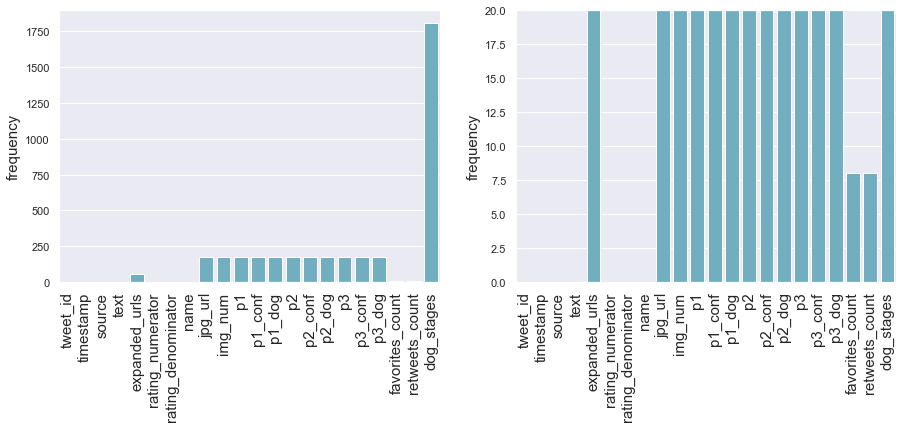

In [92]:
## Plotting chart to enable visualization of the number of null values
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
na_counts = top_dog.isna().sum()
base_color = sn.color_palette()[9]
sn.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90, fontsize = 15)
plt.ylabel('frequency', fontsize = 15);

plt.subplot(1,2,2)
na_counts = top_dog.isna().sum()
base_color = sn.color_palette()[9]
sn.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90, fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.ylim(0, 20);

The greatest number of null values occurred in the dog_stages column, whereas the image predictions data that was merged into this 'top_dog' dataframe result in some of the tweet_ids having null values in these columns. The image on the right which limits the y-values to 20 shows there are a small number of tweet_ids with null values for the favorites_count and retweets_count columns. Aside from the dog_stages column, tweet_ids that have null values in the other mentioned columns will be deleted. The null values in the expanded_urls column may also be further investigated.

### Quality issues
1. Null values in the jpg_url column
2. Null values in the favorites_count and retweets_count columns
3. Drop the p2 and p3 related columns to shrink down the dataframe for easier cleaning and analysis.

## Quality issue 7
### Define
One major quality issue that probably should have been addressed earlier and that could have saved some time and repetitions is dropping all rows where the tweet_id does not have a jpg_url. The other thing to consider is dropping the 2nd and 3rd prediction related columns. There is no intent to do any analysis relating to those columns. Applying these steps will further reduce the dataframe making it easier to further clean and perform chosen analysis. 
1. Drop all tweet_ids with that do not have a jpg_url
2. Drop all tweet_ids that do not have a favorites_count and or retweets_count value
3. Drop the p2 and p3 related columns.

### Code - Task 1

In [94]:
top_dog = top_dog.dropna(axis=0, subset=['jpg_url'])

### Test - Task 1

In [95]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   object             
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   object             
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   int64              
 6   rating_denominator  1993 non-null   int64              
 7   name                1993 non-null   object             
 8   jpg_url             1993 non-null   object             
 9   img_num             1993 non-null   float64            
 10  p1                  1993 non-null   object             
 11  p1_conf             1993 non-null   float64            
 12  p1_dog              1993 non-null 

### Code - Task 2

In [96]:
top_dog = top_dog.dropna(axis=0, subset=['favorites_count', 'retweets_count'])

### Test - Task 2

In [97]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   object             
 3   text                1985 non-null   object             
 4   expanded_urls       1985 non-null   object             
 5   rating_numerator    1985 non-null   int64              
 6   rating_denominator  1985 non-null   int64              
 7   name                1985 non-null   object             
 8   jpg_url             1985 non-null   object             
 9   img_num             1985 non-null   float64            
 10  p1                  1985 non-null   object             
 11  p1_conf             1985 non-null   float64            
 12  p1_dog              1985 non-null 

### Code - Task 3

In [98]:
top_dog = top_dog.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test - Task 3

In [99]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   object             
 3   text                1985 non-null   object             
 4   expanded_urls       1985 non-null   object             
 5   rating_numerator    1985 non-null   int64              
 6   rating_denominator  1985 non-null   int64              
 7   name                1985 non-null   object             
 8   jpg_url             1985 non-null   object             
 9   img_num             1985 non-null   float64            
 10  p1                  1985 non-null   object             
 11  p1_conf             1985 non-null   float64            
 12  p1_dog              1985 non-null 

In [100]:
# I am curious to see what it takes to be top dog!
top_dog.jpg_url.sample(3)

1687    https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg
2353    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
1425    https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg
Name: jpg_url, dtype: object

In [101]:
Image(url = 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg' )

## Quality issue 8
### Define
It is time to further investigate those super high numeric values. As depicted in the photo above, it can be understandable as to why an owner would give his/her best friend a super high rating. It is important to keep in mind if the super high numeric values are authentic and not dropped, this may result in the analysis being skewed. The goal will be to eliminate outliers that may skew the results. 
### Task
Further investigate the super high ratings_numerator values and decide if such rows should be dropped. This process will be nearly identical to that applied when cleaning the ratings_denominator column earlier. Investigate any rating_numerator values less than 10 as well. 

### Code
Note, there will include some assessing of the data as to determine if some of the high ratios are in fact due to multiple dogs.

In [102]:
# Creating a subset of the dataframe for easier investigation
sub_selection2 = top_dog[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [103]:
high_num = sub_selection2[sub_selection2.rating_numerator >= 15]

In [104]:
high_num

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [105]:
# Will query most rows suspected of being for multiple dogs but will only display one to save space
# Querying the row that has the index of 902 using the tweet_id column
top_dog.query('tweet_id == "758467244762497024"')['jpg_url']

902    https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg
Name: jpg_url, dtype: object

In [106]:
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg')

In [107]:
# The dog with the 1971/10 rating! 
top_dog.query('tweet_id == "749981277374128128"')['jpg_url']

979    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [108]:
Image(url = ' https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

In [109]:
# Rows with rating_numerators as decimal as described in the text will be rounded to the nearest whole integer.
# Tweet_id - 786709082849828864: A rating of 9.75/10 is given. Rating will be rounded to 10/10.
top_dog.loc[top_dog.tweet_id == '786709082849828864', 'rating_numerator'] = 10
top_dog.loc[top_dog.tweet_id == '786709082849828864', 'rating_denominator'] = 10

# tweet_id - 778027034220126208: A rating of 11.27/10 was given. Rating will be rounded to 11/10.
top_dog.loc[top_dog.tweet_id == '778027034220126208', 'rating_numerator'] = 11
top_dog.loc[top_dog.tweet_id == '778027034220126208', 'rating_denominator'] = 10

# tweet_id - 680494726643068929: A rating of 11.26/10 was given. Rating will be rounded to 11/10.
top_dog.loc[top_dog.tweet_id == '680494726643068929', 'rating_numerator'] = 11
top_dog.loc[top_dog.tweet_id == '680494726643068929', 'rating_denominator'] = 10

In [110]:
# Creating a list of the tweet_ids to be dropped due to the excessively high numeric value.
# Numeric values suggested to be for multiple dogs will not be dropped
# The first rating of 1776/10 is clearly an outlier.
# The second rating when checking the jpg_url was not of a dog.
bad_numerators = ['749981277374128128', '670842764863651840']
# Dropping rows if the tweet_id is in the bad_numerators
top_dog = top_dog[~top_dog.tweet_id.isin(bad_numerators)]


### Test

In [111]:
# Should be down to 1,983 rows
top_dog.shape

(1983, 16)

In [112]:
# Testing to see if the 'selected' high numeric values were successfully removed
top_dog.rating_numerator.value_counts()

12     448
10     420
11     399
13     258
9      150
8       95
7       51
14      36
5       33
6       32
3       19
4       15
2        9
1        4
0        2
165      1
44       1
45       1
60       1
80       1
84       1
88       1
99       1
121      1
143      1
144      1
204      1
Name: rating_numerator, dtype: int64

## Quality issue 9
### Define
Each column of this entire dataset can involve extensive cleaning depending on the objective when doing analysis. Given that the rating_numerator along with the rating_denominator columns are more cleaned. A new column called dog_ratings will take the ratio of numerator and denominator values. This will enable for only having to work with a single integer value instead of two. The rating_numerator and rating_denominator columns will then be dropped.
* Task 1: Create a new dog_ratings column that divides the rating_numerator by the rating_denominator. Then take a sample of the dataframe to inspect if the values in the dog_ratings column are the same when dividing the original numerator and denominator values.
* Task 2: Drop the rating_numerator and rating_denominator columns

### Code - Task 1

In [113]:
top_dog['dog_ratings'] = top_dog['rating_numerator'] / top_dog['rating_denominator']

### Test -  Task 1

In [114]:
top_dog[['rating_numerator', 'rating_denominator', 'dog_ratings']].sample(15)

,rating_numerator,rating_denominator,dog_ratings
79,12,10,1.2
725,10,10,1.0
1653,8,10,0.8
26,13,10,1.3
2175,10,10,1.0
2048,8,10,0.8
747,11,10,1.1
1921,9,10,0.9
1406,3,10,0.3
1309,11,10,1.1


In [115]:
top_dog.dog_ratings.value_counts()

1.2    452
1.0    421
1.1    405
1.3    258
0.9    151
0.8     95
0.7     51
1.4     36
0.5     33
0.6     32
0.3     19
0.4     15
0.2      9
0.1      4
0.0      2
Name: dog_ratings, dtype: int64

In [116]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1983 non-null   object             
 1   timestamp           1983 non-null   datetime64[ns, UTC]
 2   source              1983 non-null   object             
 3   text                1983 non-null   object             
 4   expanded_urls       1983 non-null   object             
 5   rating_numerator    1983 non-null   int64              
 6   rating_denominator  1983 non-null   int64              
 7   name                1983 non-null   object             
 8   jpg_url             1983 non-null   object             
 9   img_num             1983 non-null   float64            
 10  p1                  1983 non-null   object             
 11  p1_conf             1983 non-null   float64            
 12  p1_dog              1983 non-null 

### Code - Task 2

In [117]:
top_dog = top_dog.drop(['rating_numerator', 'rating_denominator'], axis = 1)

### Test - Task 2

In [118]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1983 non-null   object             
 1   timestamp        1983 non-null   datetime64[ns, UTC]
 2   source           1983 non-null   object             
 3   text             1983 non-null   object             
 4   expanded_urls    1983 non-null   object             
 5   name             1983 non-null   object             
 6   jpg_url          1983 non-null   object             
 7   img_num          1983 non-null   float64            
 8   p1               1983 non-null   object             
 9   p1_conf          1983 non-null   float64            
 10  p1_dog           1983 non-null   object             
 11  favorites_count  1983 non-null   float64            
 12  retweets_count   1983 non-null   float64            
 13  dog_stages       3

## Quality issue 10
### Define
Replace the p1 with prediction_1 for the p1, p1_conf, and p1_dog columns as a means for descriptive column names.

### Code

In [119]:
top_dog.rename(columns={'p1': 'prediction_1', 'p1_conf': 'prediction_1_conf', 'p1_dog': 'prediction_1_dog'}, inplace=True)

### Test

In [120]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           1983 non-null   object             
 1   timestamp          1983 non-null   datetime64[ns, UTC]
 2   source             1983 non-null   object             
 3   text               1983 non-null   object             
 4   expanded_urls      1983 non-null   object             
 5   name               1983 non-null   object             
 6   jpg_url            1983 non-null   object             
 7   img_num            1983 non-null   float64            
 8   prediction_1       1983 non-null   object             
 9   prediction_1_conf  1983 non-null   float64            
 10  prediction_1_dog   1983 non-null   object             
 11  favorites_count    1983 non-null   float64            
 12  retweets_count     1983 non-null   float64      

## Quality issue 11
### Define
Capitalize the first letter in all dog breed names for consistency in the prediction_1 column. This will involve using the .str.title() method. For hyphenated dog breed names, the name before and the name after the supposed hyphen will have the first letter capitalized.  

### Code

In [121]:
# Checking to see how many values in the prediction_1 column are in title format
top_dog.prediction_1.str.istitle().value_counts()

False    1593
True      390
Name: prediction_1, dtype: int64

In [122]:
top_dog.prediction_1 = top_dog.prediction_1.str.title()

### Test

In [123]:
# There should be no False values
top_dog.prediction_1.str.istitle().value_counts()

True    1983
Name: prediction_1, dtype: int64

In [124]:
top_dog.prediction_1.sample(20)

554              Miniature_Pinscher
466                Golden_Retriever
249             Irish_Water_Spaniel
2284                     Rottweiler
1094                     Schipperke
960              Labrador_Retriever
732                     Tennis_Ball
1712                         Kuvasz
919                          Geyser
700              Labrador_Retriever
1990       Chesapeake_Bay_Retriever
284                  Border_Terrier
1885                Giant_Schnauzer
1758                       Malamute
1770               Golden_Retriever
1254    Soft-Coated_Wheaten_Terrier
593     West_Highland_White_Terrier
2019                    Tennis_Ball
1322                 Border_Terrier
1614                     Pomeranian
Name: prediction_1, dtype: object

## Quality issue 11 continued
### Define
The underscores in the dog breed names in the prediction_1 column should be replaced with a hyphen. This will involve using the .str.replace() method.

### Code

In [125]:
top_dog.prediction_1 = top_dog.prediction_1.str.replace('_', '-')

### Test

In [126]:
# When running a few different samples, the underscores should be replaced with hyphens
top_dog.prediction_1.sample(15)

1701    Soft-Coated-Wheaten-Terrier
1929                     Toy-Poodle
2201                       Ski-Mask
2273                     Toy-Poodle
795                   Shopping-Cart
823                     Boston-Bull
1320                Tibetan-Mastiff
2205                       Pekinese
1508                     Bloodhound
752                  Cocker-Spaniel
1635    Soft-Coated-Wheaten-Terrier
1620                  Border-Collie
2136                          Snail
1959                          Teddy
378                 German-Shepherd
Name: prediction_1, dtype: object

## Quality issue 12
### Define
The BeautifulSoup will be imported to help clean up the HTML code from the 'source column. This will only leave the text makes it easier to read the source of the text and perform analysis. 

### Code

In [127]:
from bs4 import BeautifulSoup

In [128]:
top_dog['source'] = [BeautifulSoup(text).get_text() for text in top_dog['source']]

### Test

In [129]:
top_dog.source.value_counts()

Twitter for iPhone    1946
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

## Quality isssue 2 reiterate
### Define
The goal is to make the timestamp column into a datatype that will be easier to work with and that will enable analysis between another variable. This process will involve converting the datatype back into a string. Since the only time components that may be used in the analysis are the year, month, and day, the rest of the date portion will be stripped using string slicing. The datatype will then be reconverted back to a datetime data type.

### Code

In [130]:
# Converting back to string format
top_dog.timestamp = top_dog.timestamp.astype(str)

In [131]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1983 non-null   object 
 1   timestamp          1983 non-null   object 
 2   source             1983 non-null   object 
 3   text               1983 non-null   object 
 4   expanded_urls      1983 non-null   object 
 5   name               1983 non-null   object 
 6   jpg_url            1983 non-null   object 
 7   img_num            1983 non-null   float64
 8   prediction_1       1983 non-null   object 
 9   prediction_1_conf  1983 non-null   float64
 10  prediction_1_dog   1983 non-null   object 
 11  favorites_count    1983 non-null   float64
 12  retweets_count     1983 non-null   float64
 13  dog_stages         324 non-null    object 
 14  dog_ratings        1983 non-null   float64
dtypes: float64(5), object(10)
memory usage: 247.9+ KB


In [132]:
# Using string slicing to select a substring of the timestamp element
top_dog['timestamp'] = top_dog['timestamp'].str[:10]

In [133]:
top_dog.timestamp.sample(5)

1401    2016-02-16
1724    2015-12-24
1593    2016-01-11
1597    2016-01-10
880     2016-08-02
Name: timestamp, dtype: object

In [134]:
# Converting the data type from a string back to datetime
top_dog['timestamp'] = pd.to_datetime(top_dog['timestamp'])

### Test

In [135]:
top_dog.timestamp.sample(5)

1956   2015-12-06
781    2016-09-13
2146   2015-11-26
1183   2016-04-09
1812   2015-12-15
Name: timestamp, dtype: datetime64[ns]

In [136]:
top_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           1983 non-null   object        
 1   timestamp          1983 non-null   datetime64[ns]
 2   source             1983 non-null   object        
 3   text               1983 non-null   object        
 4   expanded_urls      1983 non-null   object        
 5   name               1983 non-null   object        
 6   jpg_url            1983 non-null   object        
 7   img_num            1983 non-null   float64       
 8   prediction_1       1983 non-null   object        
 9   prediction_1_conf  1983 non-null   float64       
 10  prediction_1_dog   1983 non-null   object        
 11  favorites_count    1983 non-null   float64       
 12  retweets_count     1983 non-null   float64       
 13  dog_stages         324 non-null    object        
 14  dog_rati

In [137]:
# Saving cleaned dataframe to a csv file
top_dog.to_csv('cleaned_top_dog.csv', index= False)

In [138]:
# Opening the cleaned dataframe as df and using the parse_dates parameter to have timestamp column load as datetime data type
df = pd.read_csv('cleaned_top_dog.csv', parse_dates = ['timestamp'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           1983 non-null   int64         
 1   timestamp          1983 non-null   datetime64[ns]
 2   source             1983 non-null   object        
 3   text               1983 non-null   object        
 4   expanded_urls      1983 non-null   object        
 5   name               1983 non-null   object        
 6   jpg_url            1983 non-null   object        
 7   img_num            1983 non-null   float64       
 8   prediction_1       1983 non-null   object        
 9   prediction_1_conf  1983 non-null   float64       
 10  prediction_1_dog   1983 non-null   bool          
 11  favorites_count    1983 non-null   float64       
 12  retweets_count     1983 non-null   float64       
 13  dog_stages         324 non-null    object        
 14  dog_rati

## Part 4 & 5. Data Exploration and analysis

In [141]:
# Exploring data related to the dog_stages column
df.dog_stages.value_counts()

pupper     223
doggo       71
puppo       27
floofer      3
Name: dog_stages, dtype: int64

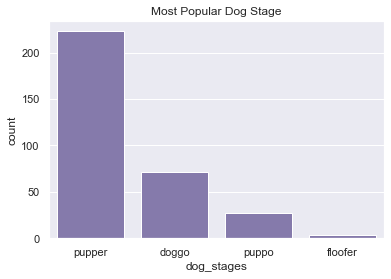

In [142]:
# Creating a bar chart to visually inspect which dog stage that was documented is the most common
chosen_color = sn.color_palette()[4]
order1 = df['dog_stages'].value_counts().index
sn.countplot(data = df, x = 'dog_stages', color = chosen_color, order = order1);
plt.title('Most Popular Dog Stage');

* Of those dogs with a dog stage documented, the puppper stage had the highest frequency of occurrences with floofer having the lowest at only three.

In [143]:
# Finding out what the most common dog breed in the dataset is by selecting only rows where the prediction_1_dog column is true
df.prediction_1_dog.value_counts()

True     1468
False     515
Name: prediction_1_dog, dtype: int64

In [144]:
# Creating another dataframe by only selecting only rows where the value is True in the prediction_1_dog column
df_breed = df.query('prediction_1_dog == True')

In [145]:
# Founding out the most common dog breeds
df_breed.prediction_1.value_counts()

Golden-Retriever      138
Labrador-Retriever     93
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Scotch-Terrier          1
Japanese-Spaniel        1
Silky-Terrier           1
Standard-Schnauzer      1
Clumber                 1
Name: prediction_1, Length: 111, dtype: int64

Suppose someone was looking to adopt a dog, and they are having an overly tough time choosing the desired breed. One suggestion could be to look at the top 15 dog breeds in this dataset. In order to do this, a horizontal bar chart with the dog breed would probably yield the greatest insight to fulfill this suggestion.

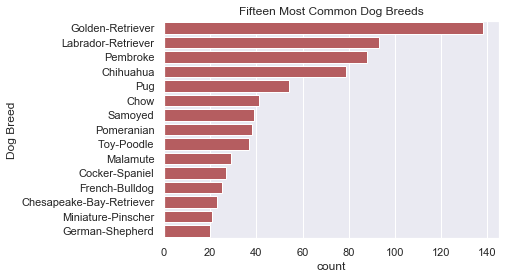

In [146]:
# Creating the horizontal bar chart
suggested_order = df_breed['prediction_1'].value_counts().head(15).index
bc = sn.color_palette()[3]
sn.countplot(data = df_breed, y = 'prediction_1', color = bc, order = suggested_order);
plt.ylabel('Dog Breed')
plt.title('Fifteen Most Common Dog Breeds');

* It looks like the Retriever breeds are top dog when it comes popularity.
* Smaller dog breeds also appear to be a popular breed choice, Chihuahua and Toy-Poodle being in the top 10. 
* It can be surprising German-Shepherds are not higher up on the list.
* Another surprise finding is that Pit Bulls are not within this top 15 list.
* Let us look at the 15 least popular dog breeds. 

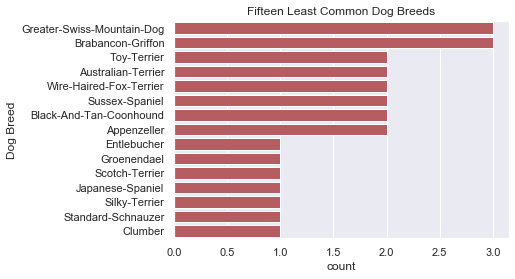

In [147]:
least_popular = df_breed['prediction_1'].value_counts().tail(15).index
sn.countplot(data = df_breed, y = 'prediction_1', color = bc, order = least_popular);
plt.ylabel('Dog Breed')
plt.title('Fifteen Least Common Dog Breeds');

* It should not be suggested that these are breeds to stay away from. More than likely these could be rarer dog breeds that are more difficult to encounter. 
* It could be noted that some of these breeds are probably unknown to many current and future dog owners. 

When it comes to naming ones best friend, some may choose a more popular name, whereas others may want to choose a more unique name. A horizonatal bar chart depicting the 30 most popular names will be presented. One could could possibly use this list to help them find a name for their pet or which names to stay away from.

In [148]:
df.name.value_counts().head(30)

None       643
Oliver      10
Cooper      10
Charlie     10
Tucker       9
Lucy         9
Penny        9
Winston      8
Sadie        8
Lola         7
Toby         7
Daisy        7
Koda         6
Bella        6
Bo           6
Stanley      6
Jax          6
Oscar        5
Chester      5
Bailey       5
Milo         5
Louis        5
Dave         5
Buddy        5
Scout        5
Leo          5
Rusty        5
Bentley      4
Archie       4
Jack         4
Name: name, dtype: int64

It is safe to say that most anyone would probably not name their dog 'None'. This value could have been changed to a Nan value to represent a null value, but it was decided to leave it as 'None'. This is an easy fix. A dataframe consisting of rows that do not have the name 'None' will be constructed. From there, a horizontal bar chart will be plotted.

In [149]:
# Creating the dataframe with a sub-selection of the data
df_name = df.query('name != "None"')

In [150]:
# Should have only 1340 rows
df_name.shape[0]

1340

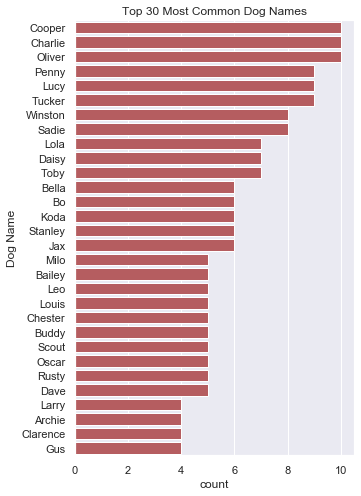

In [151]:
plt.figure(figsize = (5, 8))
common_name_order = df_name.name.value_counts().head(30).index
sn.countplot(data = df_name, y = 'name', color = bc, order = common_name_order)
plt.ylabel('Dog Name')
plt.title('Top 30 Most Common Dog Names');

* The names Charlie, Oliver, and Cooper round out the top 10, with name belonging to 10 different dogs in this dataset.
* This probably is not big enough of a data set to warrant further investigating to see if more popular dog names begin with a certain letter or if there is a preferred length for a dog name.

Examining the relationship between favorites_count and retweets_count.

Text(0.5, 1.0, 'Shares vs Likes')

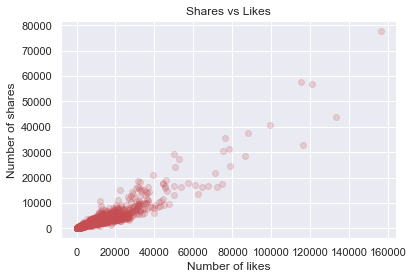

In [152]:
# Creating a scatterplot between the two quantitative variables (favorites_count and retweets_count)
plt.scatter(data = df, x='favorites_count', y = 'retweets_count', color = bc, alpha = 1/5);
plt.xlabel('Number of likes')
plt.ylabel('Number of shares')
plt.title('Shares vs Likes')

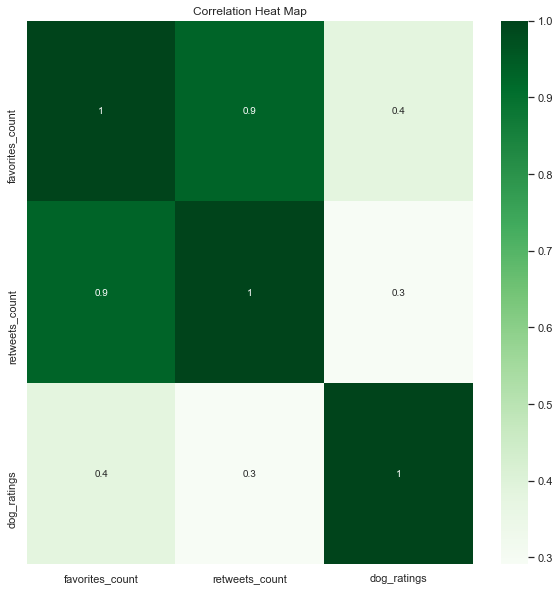

In [159]:
plt.figure(figsize =(10, 10))
sn.heatmap(df[['favorites_count', 'retweets_count', 'dog_ratings', 'jpg_url']].corr(), annot = True, fmt = '.1g', cmap = 'Greens')
plt.title('Correlation Heat Map');

* The 0.9 indicates the strongest positive correlation (darker shade of green indicates a stronger correlation) is between the number of likes and number of shares a dog gets.
This is also evident in the scatterplot displayed above the heat map.
* There is a moderate positive correlation between a dog's ratings and favorites_count (number of likes) at 0.4.
* A weak positive correlation between a dogs ratings and retweets_count (number of times shared) at 0.3.

In [160]:
df.dog_ratings.describe()

count    1983.000000
mean        1.054917
std         0.217904
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: dog_ratings, dtype: float64

In [161]:
df.dog_ratings.value_counts()

1.2    452
1.0    421
1.1    405
1.3    258
0.9    151
0.8     95
0.7     51
1.4     36
0.5     33
0.6     32
0.3     19
0.4     15
0.2      9
0.1      4
0.0      2
Name: dog_ratings, dtype: int64

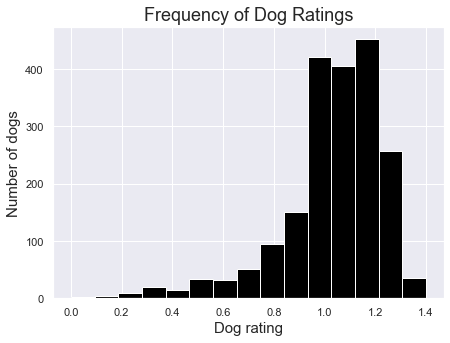

In [162]:
# Creating a histogram depicting the distribution of dog ratings
plt.figure(figsize=(7, 5))
plt.hist(df['dog_ratings'], bins = 15, color = 'black')
plt.ylabel('Number of dogs', fontsize=15)
plt.xlabel('Dog rating', fontsize = 15)
plt.title('Frequency of Dog Ratings', fontsize=18);


Most ratings are clustered on the right side resulting in a negatively skewed distribution. Fifty percent of the ratings fall within the interquartile range which are ratings from 1.0 to 1.2. The median is at 1.1, mean at 1.055 and the mode at 1.2. A typical pattern in a negatively skewed (left skewed) distribution is the mode is greater than the median, and the median greater than the mean.

In [166]:
# Creating a list of the 15 top dog breeds using the dataframe created where only the dog prediction was true
# This list will be used to gather some statistics and create some plots down below
top_15 = list(df_breed['prediction_1'].value_counts().head(15).index)

In [164]:
top_15

['Golden-Retriever',
 'Labrador-Retriever',
 'Pembroke',
 'Chihuahua',
 'Pug',
 'Chow',
 'Samoyed',
 'Pomeranian',
 'Toy-Poodle',
 'Malamute',
 'Cocker-Spaniel',
 'French-Bulldog',
 'Chesapeake-Bay-Retriever',
 'Miniature-Pinscher',
 'German-Shepherd']

In [167]:
df_breed.groupby('prediction_1')['dog_ratings'].min()[top_15]

prediction_1
Golden-Retriever            0.5
Labrador-Retriever          0.7
Pembroke                    0.4
Chihuahua                   0.3
Pug                         0.3
Chow                        1.0
Samoyed                     0.7
Pomeranian                  1.0
Toy-Poodle                  0.9
Malamute                    0.8
Cocker-Spaniel              0.9
French-Bulldog              0.8
Chesapeake-Bay-Retriever    0.8
Miniature-Pinscher          0.5
German-Shepherd             0.8
Name: dog_ratings, dtype: float64

In [168]:
df_breed.groupby('prediction_1')['dog_ratings'].max()[top_15]

prediction_1
Golden-Retriever            1.4
Labrador-Retriever          1.3
Pembroke                    1.4
Chihuahua                   1.4
Pug                         1.3
Chow                        1.3
Samoyed                     1.4
Pomeranian                  1.4
Toy-Poodle                  1.3
Malamute                    1.3
Cocker-Spaniel              1.3
French-Bulldog              1.4
Chesapeake-Bay-Retriever    1.3
Miniature-Pinscher          1.2
German-Shepherd             1.3
Name: dog_ratings, dtype: float64

In [169]:
df_breed.groupby('prediction_1')['dog_ratings'].median()[top_15]

prediction_1
Golden-Retriever            1.20
Labrador-Retriever          1.10
Pembroke                    1.20
Chihuahua                   1.10
Pug                         1.00
Chow                        1.20
Samoyed                     1.20
Pomeranian                  1.10
Toy-Poodle                  1.10
Malamute                    1.10
Cocker-Spaniel              1.20
French-Bulldog              1.20
Chesapeake-Bay-Retriever    1.00
Miniature-Pinscher          1.10
German-Shepherd             1.15
Name: dog_ratings, dtype: float64

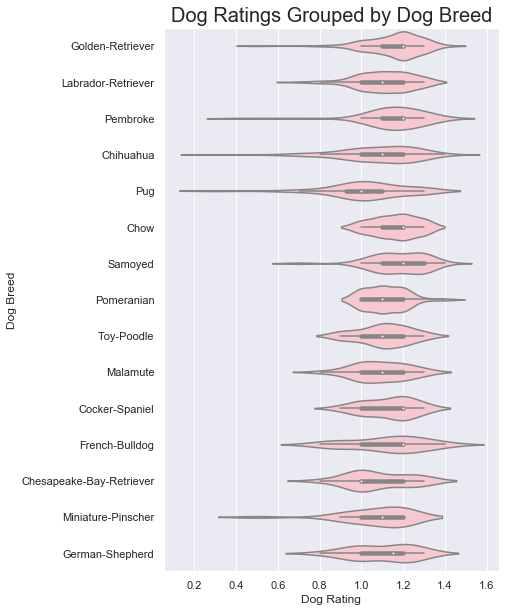

In [165]:
# Creating violinplots displaying ratings by dog breed
plt.figure(figsize = (6, 10))
sn.violinplot(data =df, y='prediction_1', x = 'dog_ratings', order = top_15, color = 'pink');
plt.ylabel('Dog Breed')
plt.xlabel('Dog Rating')
plt.title('Dog Ratings Grouped by Dog Breed', fontsize = 20);

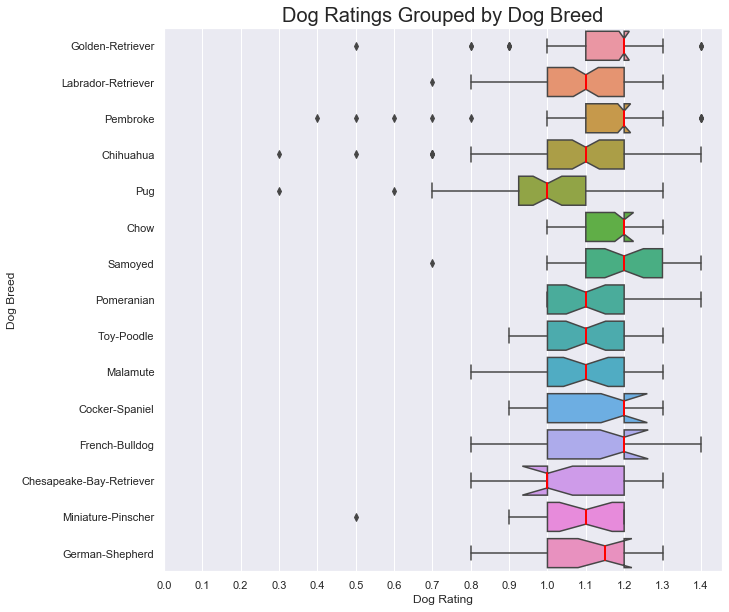

In [170]:
# Creating boxplots in place of violinplots 
# Notched boxplots to more easily see where the median dog rating for each dog breed lies
plt.figure(figsize = (10, 10))
sn.boxplot(data =df, y='prediction_1', x = 'dog_ratings', order = top_15, notch = True, \
          medianprops = dict(linestyle='-', linewidth=2, color='red')) 
plt.ylabel('Dog Breed')
plt.xlabel('Dog Rating')
plt.title('Dog Ratings Grouped by Dog Breed', fontsize = 20)
plt.xticks(np.arange(0, 1.5, 0.1));

* When examining the ratings for the top 15 dog breeds, 2/3 have an IQR from 1.0 to 1.2.  
* The red lines within the boxplots demonstrate that some dog breeds have dog rating distributions that are positively or negatively skewed. An example is the negatively skewed distribution of dog ratings for Golden-Retrievers.
* The top five dog breeds do have outliers towards lower ratings.
* Two thirds of dog breeds have a minimum of 0.9 or less
* All dog breeds except for the Miniature-Pinscher have a maximum of 1.3 or greater
* The chart above shows the top 15 dog breeds generally appear to have favorable  dog ratings with some outliers leaning towards less favorable  ratings. 

In [186]:
# Creating a list of the 15 least common dog breeds to be used in the boxplot below
bottom_15 = list(df_breed['prediction_1'].value_counts().tail(15).index)

In [188]:
bottom_15

['Greater-Swiss-Mountain-Dog',
 'Brabancon-Griffon',
 'Toy-Terrier',
 'Australian-Terrier',
 'Wire-Haired-Fox-Terrier',
 'Sussex-Spaniel',
 'Black-And-Tan-Coonhound',
 'Appenzeller',
 'Entlebucher',
 'Groenendael',
 'Scotch-Terrier',
 'Japanese-Spaniel',
 'Silky-Terrier',
 'Standard-Schnauzer',
 'Clumber']

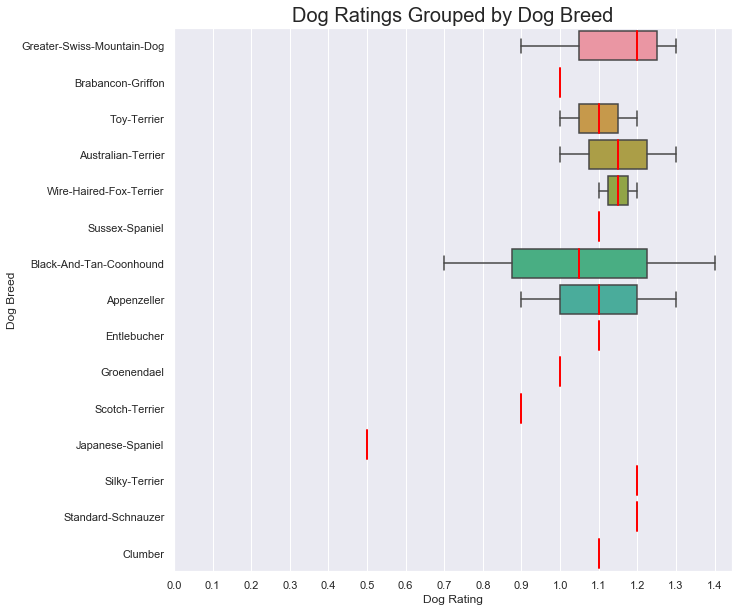

In [187]:
plt.figure(figsize = (10, 10))
sn.boxplot(data =df, y='prediction_1', x = 'dog_ratings', order = bottom_15,    \
          medianprops = dict(linestyle='-', linewidth=2, color='red')) 
plt.ylabel('Dog Breed')
plt.xlabel('Dog Rating')
plt.title('Dog Ratings Grouped by Dog Breed', fontsize = 20)
plt.xticks(np.arange(0, 1.5, 0.1));

When looking at the dog rating distributions for the 15 least common dog breeds, we do not see similar patterns in comparison to the top 15 most common dog breeds. This most likely has to do with the fact if there are few counts of a dog breed, there will be fewer dog ratings to observe and thus may not really infer any useful statistics. 

In [189]:
df.source.value_counts()

Twitter for iPhone    1946
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

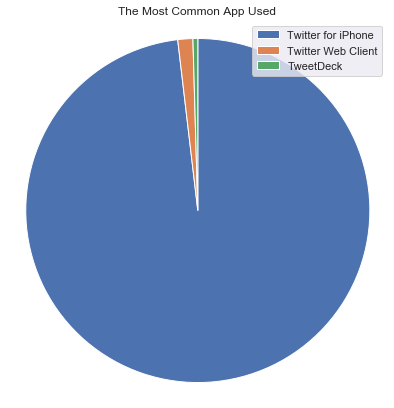

In [190]:
# Creating a pie chart to visualize the app or source was used to tweet.
plt.figure(figsize = (7, 7))
sorted_counts = df['source'].value_counts()
plt.pie(sorted_counts,startangle = 90, counterclock = False)
explode = (0, 0, 1, 2)
plt.axis('square')
plt.legend(sorted_counts.index)
plt.title('The Most Common App Used');

Twitter for iPhone is clearly the most common app used when compared to Tweeter Web Client and TweetDeck.

### Resources
* https://stackoverflow.com/questions/51898826/converting-object-column-in-pandas-dataframe-to-datetime
* https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
* https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
* https://stackoverflow.com/questions/24775648/element-wise-logical-or-in-pandas
* https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them
* https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
* https://stackoverflow.com/questions/43269548/pandas-how-to-remove-rows-from-a-dataframe-based-on-a-list
* https://stackoverflow.com/questions/49291740/delete-rows-if-there-are-null-values-in-a-specific-column-in-pandas-dataframe
* https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
* https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isupper.html
* https://stackoverflow.com/questions/44703945/pandas-trouble-stripping-html-tags-from-dataframe-column
* https://stackoverflow.com/questions/49733918/how-to-keep-the-same-datatype-after-saving-data-to-csv-file
* https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
* https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/Box_plot_interpretation.ipynb

### Intermission for this notebook. 